In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.available
plt.style.use("seaborn")

# preparing data for training

In [2]:
x = pd.read_csv("./Downloads/Linear_X_Train.csv")
y = pd.read_csv("./Downloads/Linear_Y_Train.csv")
X = np.array(x).reshape((x.shape[0]))
Y = np.array(y).reshape((y.shape[0]))
d = x.join(y)
d

,x,y
0,-0.289307,-0.091101
1,-0.588810,-53.467721
2,1.027507,75.457009
3,-0.259013,-12.025286
4,0.782043,57.414187
...,...,...
3745,-0.100992,-13.530595
3746,1.349197,114.741657
3747,-0.305164,-34.983275
3748,1.675833,145.206092


# visualisation

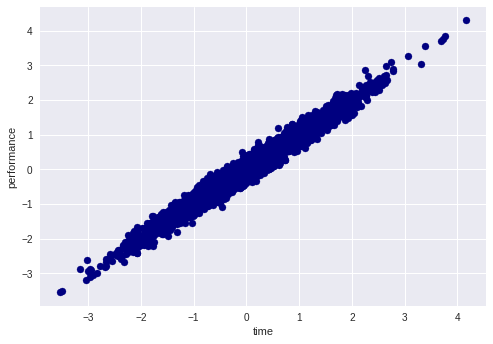

In [12]:
plt.scatter(X,Y,color = "navy",marker = "o")
plt.xlabel("time")
plt.ylabel("performance")
plt.show()

# hypothesis

In [4]:
def hypo(X,theta,bias):
    X = X.reshape((X.shape[0],1))
    k = X.dot(theta).T
    return k + bias

#  calculating error

In [5]:
def error(X,Y,theta,bias):
    
    m = X.shape[0]
    error = 0
    hx = hypo(X,theta,bias)
    for i in range(m):
        
        error += ((hx[i]-Y[i])**2)*0.5
        
    return error


#  calculating partial derivative for descent

In [6]:
def gradient(X,Y,theta,bias):
    
    opt_theta = np.zeros((theta.shape[0],))
    opt_bias = 0
    hx = hypo(X,theta,bias)
    
    for i in range(X.shape[0]):
        
        opt_theta[0] = (hx[i] - Y[i])*X[i]
        opt_bias = (hx[i] - Y[i])
        
    return opt_theta,opt_bias

# gradient decent 

In [7]:
def gradient_descent(X,Y,learning_rate = 0.001):
    theta = np.array([1.0])
    B = 0.1
    i = 0
    err_list =[];
    theta_list = [];
    bias_list =[];
    
    while(i<=2500):
        grad,bi = gradient(X,Y,theta,B)
        hx = hypo(X,theta,B)
        e = error(X,Y,theta,B)
        err_list.append(e)
        
        theta_list.append(theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        B -= learning_rate*bi
        
        i =i+1
    return theta,B,theta_list,err_list,bias_list

In [8]:
optimized_theta,optimized_bias,t_list,e_list,bias_list = gradient_descent(X,Y)
print(e_list[-1])
print(optimized_theta,optimized_bias)


138.3016855875536
[0.950325] 0.20855868122868346


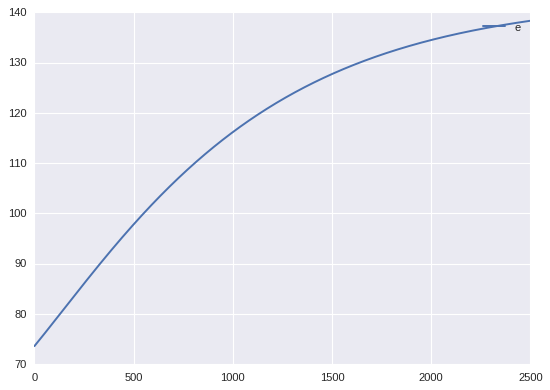

In [190]:
plt.plot(e_list,label ="e")
#plt.plot(t_list,label = "t", color = "red")
plt.legend()
plt.show()

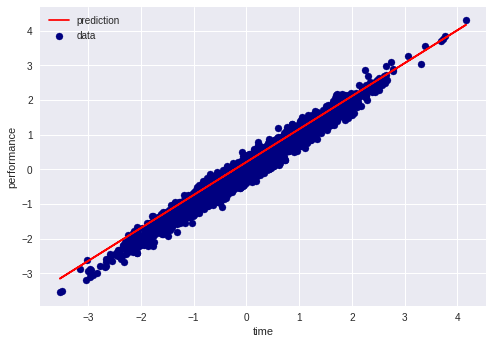

In [13]:
plt.scatter(X,Y,color = "navy",marker = "o", label = "data")
plt.plot(X,hypo(X,optimized_theta,optimized_bias), color ="red",label = "prediction" )
plt.legend()
plt.xlabel("time")
plt.ylabel("performance")
plt.show()

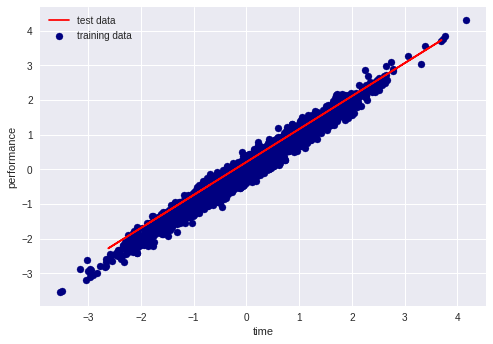

In [18]:
testx = pd.read_csv("./Downloads/Linear_X_Test.csv")
X_test = testx.values
plt.scatter(X,Y,color = "navy",marker = "o", label = "training data")
plt.plot(X_test,hypo(X_test,optimized_theta,optimized_bias), color ="red",label = "test data" )
plt.legend()
plt.xlabel("time")
plt.ylabel("performance")
plt.show()


In [19]:
i = float(input("enter time"))
time = np.array([i])
performance = hypo(time,optimized_theta,optimized_bias)
print("expected performance:",performance)

enter time4
expected performance: [4.00985869]
